# Brownian motion and the emergence of diffusion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

### Contents

1. Historical background overview
2. Fick's law and Einstein relation
3. Brownian motion and Brownian simulations
4. Emergence of difussion equation
5. Numerical validation of emergent diffusion
6. Concluding remarks

### Reading Material

- Dynamical theories of Brownian motion by Edward Nelson (Chapters: 2, 3 and 4): https://web.math.princeton.edu/~nelson/books/bmotion.pdf
- A video of Brownian motion: 
https://www.youtube.com/watch?v=cDcprgWiQEY
- More advance material for interested readers: The Langevin Equation: With Applications to Stochastic Problems in Physics, Chemistry and Electrical Engineering by Yuri P Kalmykov and William T Coffey (Chapter 1, section 1.1 to 1.5)
https://www.researchgate.net/publication/258724363_The_Langevin_Equation_With_Applications_to_Stochastic_Problems_in_Physics_Chemistry_and_Electrical_Engineering_3rd_Edition

## 1. Historical background overview
(based on Dynamical theories of Brownian motion by Edward Nelson)
- In the early 1800's, the botanist Robert Brown studied the apparently random movement of pollen particles suspended in water, now called Brownian motion. Since practically anyone looking at water through a microscope was able to see little things moving around, he did not discover Brownian motion. However, he did establish Brownian motion as an important phenomenon, and he ruled out the hypothesis that the effect was life-related.
- The phenomenon continued to be studied by several scientists. By 1905, the kinetic theory, that Brownian motion of microscopic particles is caused by bombardment by the molecules of the fluid, seemed the most plausible. However, the attempts failed due to the fractal nature of the velocity of Brownian particles.
- In 1905, Einstein's publishes in one of his Annus Mirabilis papers, where he developed the statistical mechanics and the molecular-kinetic theory of thermodynamics. He did this mostly unaware of the existence of the phenomenon and previous studies. The theory was correct and described consistently the experimental observations of Brownian motion.
- Despite having developed a succesful theory, Einstein's theory does not give a dynamical theory of Brownian motion; it only determines the nature of the motion and the value of the diffusion coefficient on the basis of some assumptions. Smoluchowski and Langevin, independently from Einstein, attempted a dynamical theory, and arrived to similar results. These dynamic theory of Brownian motion was the birth of the field of stochastic differential equations.
- The agreement of these considerations with experience together with Planck’s determination of the true molecular size from the law of radiation (for high temperatures) convinced the sceptics, who were quite numerous at that time (Ostwald, Mach) of the reality of atoms.

## 2. Fick's law and Einstein relation

Consider a suspension of many Brownian particles in a fluid/solvent. The concentration of particles in space is given by $\rho(x)$. To simplify the calculation, we will assume we measure the concentration at different points in a large tube, i.e. we restrict ourselves to one dimension. 

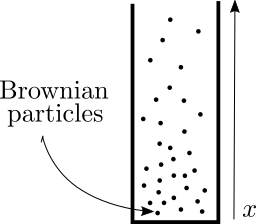

Fick's law postulates that the flux of particles goes from regions of high concentration to regions of low concentration. For instance, when dropping a drop of blue ink in a glass water, it will diffuse from the drop (high-conentration) to the rest of the water (low concentration) until it is evenly distirbuted. More specifically, it relates the diffusive flux $J_\text{diffusion}$ to the derivative of the concentration (the gradient in higher dimensions).

$$
J_\text{diffusion}=-D \frac{d \rho(x)}{d x} ,
$$

The flux is the rate of transfer of particles through a unit area. It is proprtional to the difference in concentration (the derivative), and it is proportional to some diffusion coefficient $D$, which may be different for different particles and solvents.


Now, assume the particles are subjected to some arbitrary external force $F$ (e.g. gravity), and thus particles will naturally drift towards the direction they are being pushed by this force. Thus, the flux of particles due to this force will be 

$$
J_\text{drift} = \frac{1}{\gamma}\rho(x)F,
$$

where $\gamma$ is the corresponding friction coefficient. Higher friction implies less particle flux and viceversa. Conversely, higher concentration and larger force will imply larger flux, so must also be proportional to $\rho$ and $F$. Conservative forces, such as gravity, can be written as the derivative of a potential function $U(\mathbf{x})$ (the gradient in higher dimensions),

$$
F=-\frac{d U(x)}{d x} 
$$

An analogy to understand the potential is to think of the potential function as a slide for a marble. The force felt by the marble will be proportional to the slope of the slide, i.e. the derivate of the potential function :

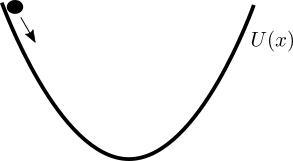

The minus sign is just a convention.

In equilibrium, forces are equilibrated, so there is no net flux of particles anywhere in space. Thus $J_\text{diffusion} + J_\text{drift} = 0$. Substituting, we obtain

$$
-D \frac{d \rho(x)}{d x} - \frac{1}{\gamma}\rho(x)\frac{d  U(x)}{d x} = 0.
$$

From Statistial mechanics, one can obtain that the Brownian particles in the solvent follow the Boltzman distribution when they reach equilibrium, so the concentration has the profile

$$
\rho(\mathbf{x}) = A\exp \Big(-\frac{U(x)}{k_B T}\Big)
$$

where $k_B$ is the Boltzmann constant, a proportionality constant relating average relative kinetic energy of particles in a fluid with its temperature $T$; $A$ is a constant related to the total number of Brownian particles. 

Differentiating this equation using the chain rule (omitting $x$ dependence to simplify notation), we obtain

$$
\frac{d \rho}{d x}  = \frac{d \rho}{d U} \frac{d U}{d x} =-\frac{1}{k_B T}\rho\frac{d U}{d x} 
$$

Substituting this into the flux balance equation, we obtain

$$
D \frac{1}{k_B T}\rho\frac{d U}{d x} - \frac{1}{\gamma}\rho \frac{d  U}{d x} = 0.
$$

which simplifies to

$$
D = \frac{k_B T}{\gamma}.
$$

This is called the Einstein relation and it relates the diffusion of Brownian particles quantified by the diffusion coefficient $D$ with the dissipation quantified by the friction coefficient $\gamma$. A more general form of this result is called the fluctuation–dissipation theorem since it relates fluctuations (diffusion) and dissipation (friction). This was one of the main results in Einstein's 1905 paper.

## 2. Brownian motion and Brownian simulations
We have talked about some equilibrium properties of Brownian motion. However, we have not yet studied the dynamics of individual Brownian particles. These dynamics correspond to the microscopic theory (bottom). As the formal theory to describe Brownian motion is quite involved, perhaps a more accesible approach to introduce it is through numerical simulations. 

Consider a Brownian particle with position $x(t)$ at time $t$ in one dimension. We would like to develop a numerical scheme capable of calculating the position of the particle a time interval $\Delta t=1$ later, i.e $x(t+\Delta t)$. As Brownian motion is random, we expect to add a random number $R$,

$$
x(t+\Delta t) = x(t) + R.
$$

This random number however must be sampled from some distribution. As the particles seems likely to stay in the same area, small movements seem much more likely than large ones. Furthermore, it seems every direction is equally likely, so a natural candidate is a standard normal distribution (Gaussian); 

$$
\frac{1}{\sqrt{2\pi}}\exp \Big( -\frac{x^2}{2} \Big),
$$

In [ ]:
# Plot standard normal distribution
x = np.linspace(-4,4,40)
y = 1/np.sqrt(2 * np.pi) * np.exp(-x*x/2)
plt.plot(x,y)
plt.title("Normal distirbution");
plt.xlabel("x");

In python one can easily draw random numbers following this distribution by using the function: 

In [ ]:
np.random.normal(0,1)

The two numbers, $0$ and $1$ refer to the mean and standard deviation of the normal distribution. For a standard normal distriution, these are zero and one, respectively. It is easy to test the sampled numbers actually follow a normal distribution. Lets sample a large number of values that follow this distribution and plot their distribution:

In [ ]:
# Sample random values from a standard normal distibution
values = []
num_samples = 2000
for i in range(num_samples):
    r = np.random.normal(0,1)
    values.append(r)

# Plot histogram of sampled numbers (normalized frequency distribution)
bins = 30
plt.hist(values, bins, density=True, label="Histogram of sampled numbers distribution")
plt.plot(x,y, lw =2, label="Standard normal distribution")
plt.ylim([0,0.55])
plt.legend();

We denote a random number sampled from this distribution as $\mathcal{N}(0,1)$. Now we can write the equation for the time evolution of the position of the Brownian particle as

$$
x(t+\Delta t) = x(t) + \sigma \mathcal{N}(0,1),
$$

where we added a coefficient $\sigma$ to scale how fast the particle can move. Note that the particle is likely to move farther away if $\Delta t$ is larger. In such case, we need to modify the variance of our normal distribution. However if we simply assume $\Delta t =1$, everything remains consistent. 

With this equation we can simulate a Brownian trajectory and plot it as a fucntion of time:

In [ ]:
# One dimensional simulation of one Brownian particle
xlist=[0]
sigma = 1
max_steps = 250
for i in range(max_steps):
    xnew = xlist[i] + sigma * np.random.normal(0,1)
    xlist.append(xnew)
    
# Plot position as function of time
plt.plot(xlist)
plt.xlabel("time")
plt.ylabel("position")

We can easily extend this to two or more dimensions by sampling a random number the same way for each additional axis. Thus we can simulate a Brownian trajectory in two dimensions as follows

In [ ]:
# Two dimensional simulation of one Brownian particle
x0 = np.array([0,0]) # initial position (0,0)
sigma = 1
xlist = [x0] 
max_steps = 250
for i in range(max_steps):
    xnew = xlist[i] + sigma * np.random.normal(0,1,2)
    xlist.append(xnew)
xarray = np.array(xlist)

# Plotting function for Brownian trajectory
def plot_brownian(timestep):
    xvalues = xarray[:,0]
    yvalues = xarray[:,1]
    minval = np.min(xarray)
    maxval = np.max(xarray)
    plt.xlim([minval,maxval])
    plt.ylim([minval,maxval])
    plt.plot(xvalues[0:timestep], yvalues[0:timestep], label="Brownian trajectory"); # plots trajectory
    plt.plot(xarray[timestep-1][0],xarray[timestep-1][1],'or') # plots current position as red dot
    plt.title("2D Brownian trajectory");
    plt.legend();

# Interactive plot of Brownian trajectory    
interact(plot_brownian, timestep=(1,max_steps));

Note every time the code is simulated the trajectory will be different since it is resampled every time.

For the interested reader, this is actually a discretization of a stochastic differential equation: $dX_t=\sigma dW_t$, which is the equation for standard Brownian motion. The corresponding discretization of the equation used to do the simulation corresponds to the Euler-Maruyama scheme.

## 3. Emergence of diffusion equation

Although each Brownian particle follows a random trajectory, from the motion of a large collection/ensemble of these particles emerges a deterministic and predictable behavior. Mathematically one can show that from the ensemble dynamics of many Brownian particles a deterministic diffusion equation emerges. As these calculations are beyond the scope of this lecture, we derive the diffusion equation in a simpler way, and we later use a numerical approach to show the emergence of diffusion. In this case, the diffusion equation corresponds to the macroscopic theory (top). One of the main features of the macroscopic theory here is that it is deterministic and thus has a strong predictive power.

We begin with a derivation of the diffusion equation. As mass is conserved, we can write an equation for the conservation of Brownian particles. This will be in the form of a differential equations, which is nothing more than an equation that involves derivatives. Assume again the concentration of Brownian particles is $\rho(x,t)$, where we now make the concentration time-dependent. We keep the one dimensional assumption to keep things simple. Then the conservation of particles can be written as follows:

$$
\frac{\partial \rho}{\partial t} = -\frac{J(x+\Delta x) - J(x)}{\Delta x}
$$

where $J$ is the flux of particles. The equation means that the change of number of particles in asmall volume $\Delta x$ during an infinitesimal time interval equals to the number of particles that flowed into the volume minus the ones that flowed out of it during that time interval. Of course one can take the limit as $\Delta x \rightarrow 0$ to obtain 

$$
\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x} J = 0,
$$

This equation is also called the continuity equation. We can substitute Fick's law into this equation and obtain

$$
\frac{\partial \rho}{\partial t} = -\frac{\partial}{\partial x} \Big( -D \frac{\partial \rho(x)}{\partial x} \Big),
$$

which simplifies to

$$
\frac{\partial \rho}{\partial t} = D\frac{\partial^2 \rho(x)}{\partial x^2}.
$$

This is another differential equation (partial differential equation), called the diffusion equation. We won't solve it here, but its solution is quite simple. Assuming all the particles are concentrated at $x=0$ at time 0, the solution is

$$
\rho(x,t) = \frac{1}{ \sqrt{4\pi D t}} \exp \Big( -\frac{x^2}{4Dt}\Big).
$$

This is a function of time and space, so to better understand it, we can do a small animation of the solution

In [ ]:
# Define difussion coefficient
D = 1

# Define plotting solution function
def rho_plot(time):
    x = np.linspace(-5,5,40)
    A = 1/np.sqrt(4 * np.pi * D * time)
    rho = A * np.exp(-x*x/(4 * D * time))
    plt.plot(x,rho)
    plt.ylim(0,0.5)
    plt.ylabel(r'$\rho(x)$')
    plt.xlabel(r'$x$')

# Create interactive plot
interact(rho_plot,time=(0.1,5,0.5));

Although here we used Fick's law to derive the diffusion equation, it is not neccesary. It can be derived directly from the microscopic Brownian dynamics. However, that is beyond the scope of this lecture, so we will try to show that this is true by doing numerical simulations.

## 4. Numerical validation of emergent diffusion

In this section, we will show how the diffusion equation for the concentration of Brownian particles emerges from the microscopic dynamics of individual Brownian particles. In order to do so, we will follow the next steps:
 
 1. Simulate a large number of identical Brownian particles in one dimension.
 2. Discretize space in intevals of equal length.
 3. Calculate the corresponding concentration of Brownian particles on each interval.
 4. Plot the concentration as a histogram for different times


In [ ]:
x0 = 0 # initial position for all particles
sigma = 1
max_steps = 250
num_particles = 500

# Function to integrate the trajetory of one Brownian particle in one dimension (x0 initial position)
def integrate_brownian(xinitial):
    xlist=[xinitial]
    for i in range(max_steps):
        xcurrent = xlist[i] 
        xnew = xcurrent + sigma * np.random.normal(0,1)
        xlist.append(xnew)
    return np.array(xlist)

# Integrate Brownian trajetory of all Brownian particles and saves all the data into
# brownian_trajectories (calls integrate_brownian)
brownian_trajectories = []
for i in range(num_particles):
    brownian_trajectory = integrate_brownian(x0)
    brownian_trajectories.append(brownian_trajectory)

# Function to extract positions of all the Brownian particles at a given time step    
def extract_positions(timestep):
    positions = []
    for i in range(num_particles):
        positions.append(brownian_trajectories[i][timestep])
    return positions

# Function to plot the histogram of the particles distribution at a given time step
def plot_particles_distribution(timestep):
    positions = extract_positions(timestep)
    plt.hist(positions, 30, density=True, label="Distribution of Brownian particles")
    plt.xlim([-50,50])
    plt.ylim([0,0.1])
    plt.legend()

# Interactive plot of particles distribution
interact(plot_particles_distribution, timestep=(1,max_steps,10));

This looks very similar to the profile obtained when solving the diffusion equation. Note we used $\sigma =1$ for the simulation. There is actually a relation between sigma and the diffusion coefficient 

$$
D = \frac{\sigma^2}{2}.
$$

We will leave this derivation for an excercise. If $\sigma=1$, then $D=1/2$. As the solution of the diffusion equation we know is 

$$
\rho(x) = \frac{1}{ \sqrt{4\pi D t}} \exp \Big( -\frac{x^2}{4Dt}\Big).
$$

We can compare it with our result:

In [ ]:
# Set diffusion coefficient to matching value
D = 1/2

# Plot comparison between the histogram of the particles distribution and the solution of the corresponding
# emergent diffusion equation at a given time step
def plot_comparison(timestep):
    t = 1 * timestep
    # Plot histogram of concentrations
    positions = extract_positions(timestep)
    plt.hist(positions, 30, density=True, label="Distribution of Brownian particles")
    # Plot solution to diffusion equation    
    x = np.linspace(-50,50,25)
    A = 1/np.sqrt(4 * np.pi * D * t)
    rho = A * np.exp(-x*x/(4 * D * t))
    plt.plot(x, rho, lw=2, label= "Solution of diffusion equation")
    plt.xlabel(r'$x$')
    plt.xlim([-50,50])
    plt.ylim([0,0.1])
    plt.legend()

    
interact(plot_comparison, timestep=(5,max_steps,10));

This shows the macroscopic diffusion is really an emergent behavior from the ensemble of microscopic Brownian particles. Note that using Einstein's relation, we can write the dynamics of the Brownian walkers as

$$
x(t+1) = x(t) + \sqrt{2D}\mathcal{N}(0,1)  \\[5mm]
       = x(t) + \sqrt{\frac{2k_B T}{\gamma}}\mathcal{N}(0,1),
$$

where $\Delta t= 1$. For a general $\Delta t$ it can be written as 

$$
x(t+\Delta t) = x(t) + \sqrt{\frac{2k_B T \Delta t}{\gamma}}\mathcal{N}(0,1),
$$

which corresponds to the discretization of the stochastic differential equation

$$
dX_t = \sqrt{\frac{2k_B T}{\gamma}} dW_t.
$$

However, this is beyond the scope of this lecture. Further investigation of this topic is left as a possible project.

## 5. Concluding remarks

- We derived the Einstein relation that establishes a relation between diffusion and dissipation in Brownian particles. This is a fundamental result to connect the microscopic world described by the dynamics of particles with the macroscopic emergent phenomena such as diffusion. 

- We introduced the dynamics of individual Brownian particles through a simulation scheme, and we showed how it can be extended to two (or more) dimensions. We hint at the connection to the field of stochastic differential equations, which is the mathematically correct approach to understand Brownian motion. This theory correspond to the microscopic theory (bottom).

- We showed that the diffusion equation emerges from the dynamics of a large number of Brownian particles. This corresponds to the macroscopic theory (top). Although we used Fick's law (an emergent law) to derive the equation. It can be done without it, but it requires more advanced techniques. This is left as a possible project.

- To really show the macroscopic diffusion emerges from the dynamics of a large number of individual Brownian particles, we implemented numerical validation, and we compared the results with the solution to the corresponding diffusion equation. We finally show the final form of the stochastic differential equation for Brownian motion.

The studies of Brownian motion not only provided a physical theory to describe Brownian movement; they also gave birth to the field of stochastic differential equations. These equations describe trajectories that are nowhere differentiable, such as idealized Brownian trajectories, and thus require a different type of calculus called Ito calculus. Furthermore, each system of stochastic differential equations has a corresponding emergent "diffusion" equation called the Fokker-Planck equation. This yields a fundamental duality; the stochastic dynamics of individual particles/agents together with the probabilistc dynamics of an ensemble of identical particles/agents are two sides of the same underlying process, an stochastic process. Today, these equations are used in applications ranging from molecular biology to financial mathematics. 